# Practice Choosing Models

## Setup

In [61]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('german_credit_data.csv', index_col=0)
data = load_breast_cancer()
df2 = pd.DataFrame(data.data, columns=data.feature_names)
df2['target'] = data.target

## Testing Method

In [62]:
def test_dataset(test_val, df):   
    # Split dataset into training and testing sets
    X = df.drop(test_val, axis=1)
    y = df[test_val]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Scale the features using StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('SVM', SVC(gamma='auto')))

    # evaluate each model in turn
    highest = 0.0
    result = y_test

    for name, model in models:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            if accuracy_score(y_test,y_pred) > highest:
                  highest = accuracy_score(y_test,y_pred)
                  result = y_pred
            msg = "%s: %f" % (name, accuracy_score(y_test,y_pred))
            print(msg)
    print("\n")
    return [y_test, result] # Returns all accuracy scores of the single models

## Task 1) Data Overview

Take a look at both datasets. What values are you working with? Also think about which models could be suitable for each dataset.

### German Credit Dataset

In [63]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [64]:
# Explore dataset 1
print("Purpose : ",df.Purpose.unique())
print("Sex : ",df.Sex.unique())
print("Housing : ",df.Housing.unique())
print("Saving accounts : ",df['Saving accounts'].unique())
print("Risk : ",df['Risk'].unique())
print("Checking account : ",df['Checking account'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' nan 'rich']


### Breast Cancer Dataset

print(df2.head())

In [65]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [66]:
print(df2.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

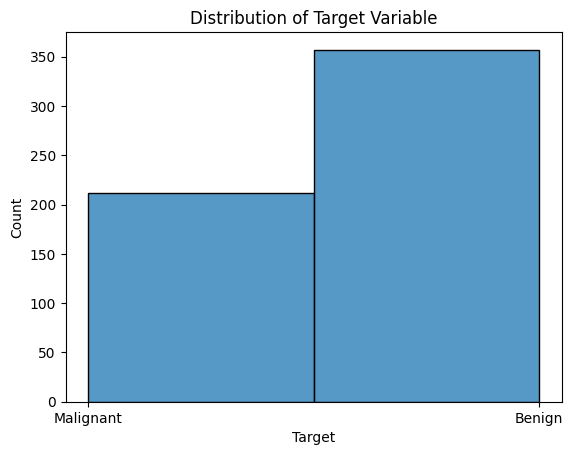

In [67]:
sns.histplot(data=df2, x='target', bins=2)
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

## Task 2) Data Cleanup

Try to replace all missing values with the means of their according columns and convert all non numeric values into numeric values in the german_credit_dataset. Can you also come up with a new feature to improve your result?

In [68]:
# Replace 'male' with 0 and 'female' with 1 in 'Sex' column
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df['Risk'] = df['Risk'].replace({'good': 1, 'bad': 0})

# Convert categorical columns from strings to floats
cat_cols = ['Housing', 'Saving accounts', 'Checking account']
for col in cat_cols:
    df[col] = pd.factorize(df[col])[0]

# Replace missing values with mode
df['Saving accounts'] = df['Saving accounts'].fillna(df['Saving accounts'].mode()[0])
df['Checking account'] = df['Checking account'].fillna(df['Checking account'].mode()[0])

# Group the data by 'Purpose' and calculate the mean of 'Credit amount'
avg_credit_by_purpose = df.groupby('Purpose')['Credit amount'].mean()

# Print the result
print(avg_credit_by_purpose)

# Replace the 'Purpose' categories with the corresponding average credit amount
df['Purpose'] = df['Purpose'].map(avg_credit_by_purpose)

Purpose
business               4158.041237
car                    3768.192878
domestic appliances    1498.000000
education              2879.203390
furniture/equipment    3066.988950
radio/TV               2487.653571
repairs                2728.090909
vacation/others        8209.333333
Name: Credit amount, dtype: float64


### German credit dataset

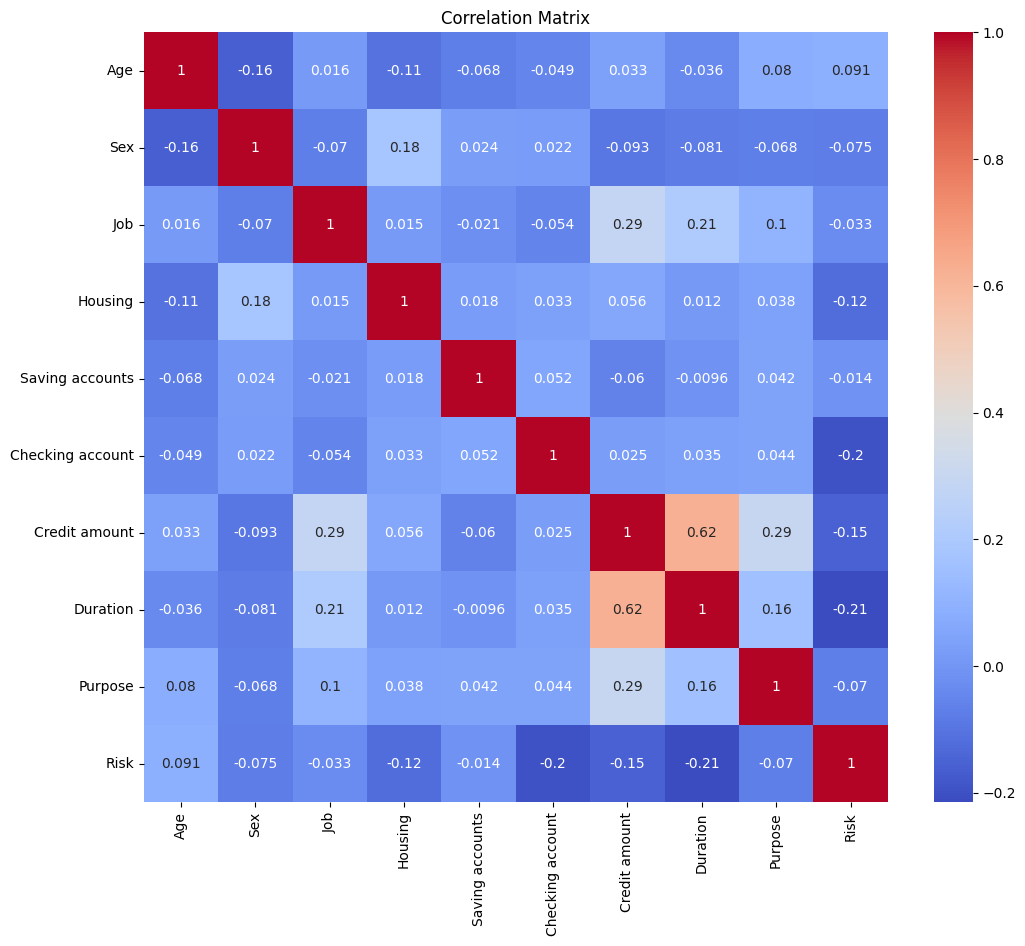

In [69]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Breast cancer dataset

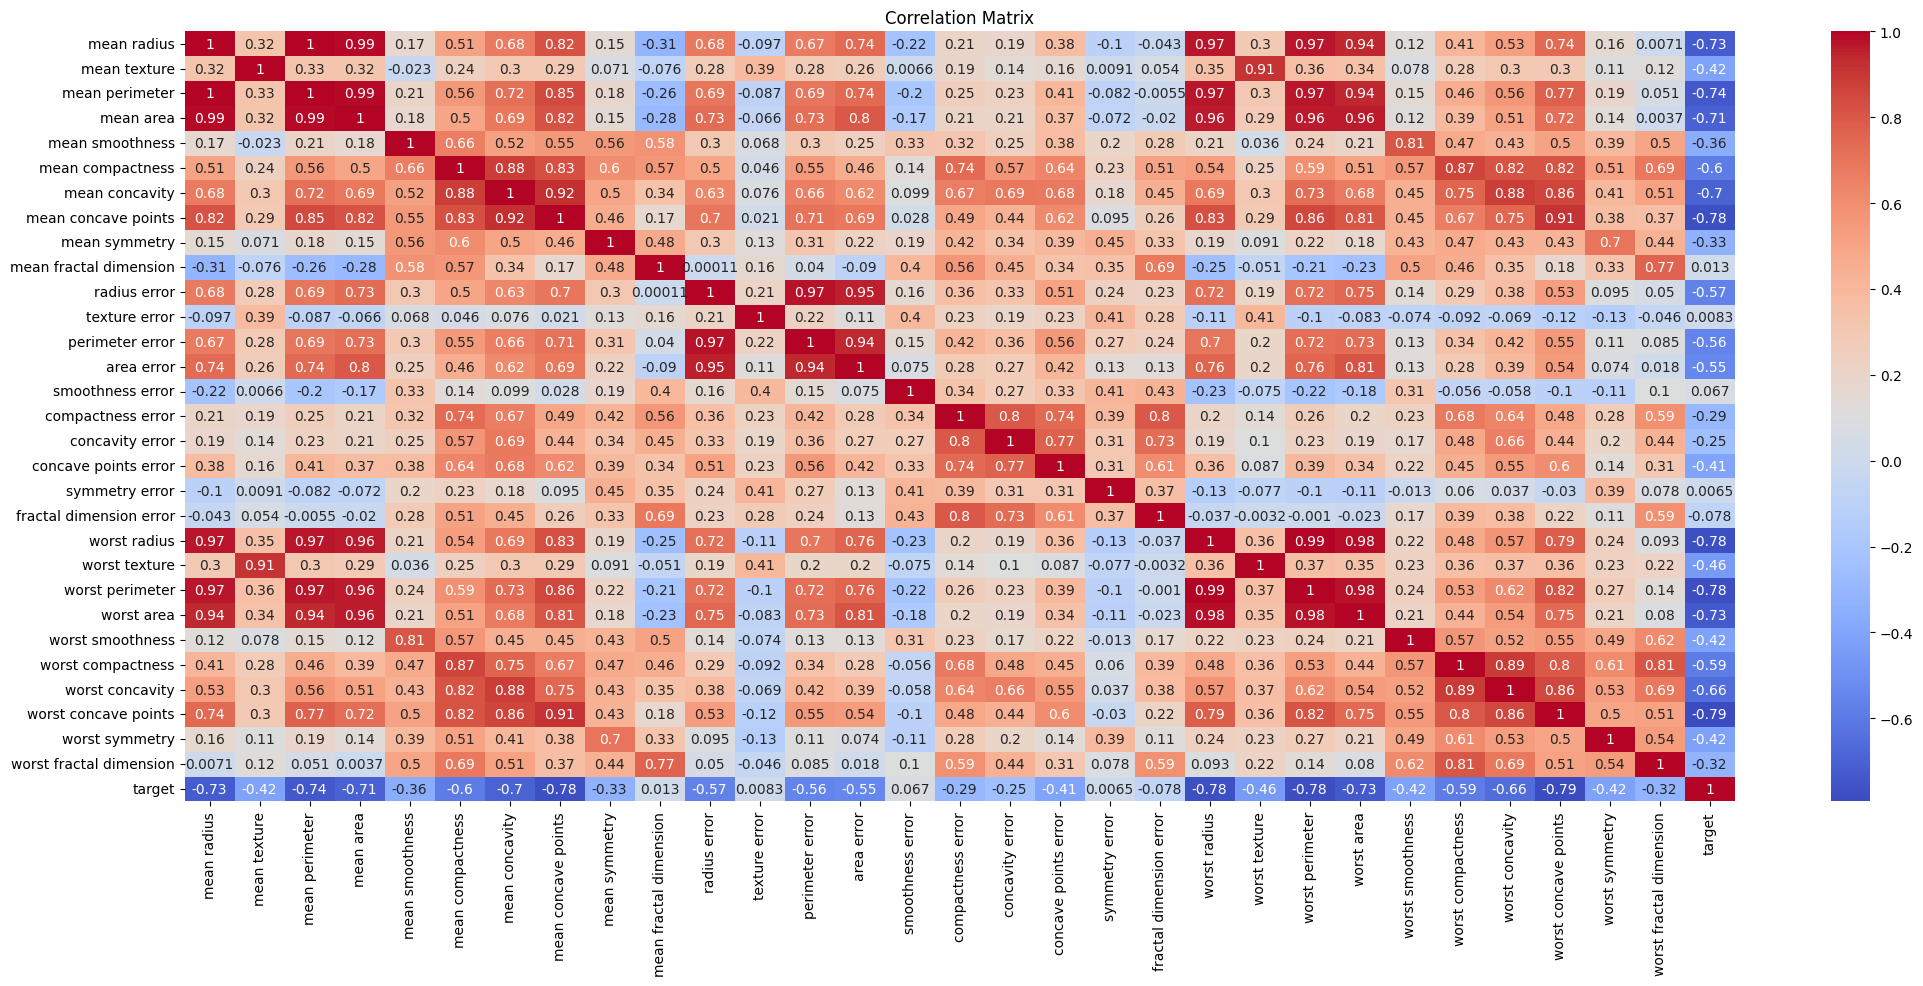

In [70]:
corr2 = df2.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Task 3) Find a suitable Model

Try your dataset with the given test_dataset function and interpret the results. Which ml-learning model is the best suited one for each problem?

In [71]:
test_1 = test_dataset('Risk', df)
test_2 = test_dataset('target', df2)

LR: 0.706667
LDA: 0.706667
KNN: 0.700000
CART: 0.656667
NB: 0.703333
RF: 0.743333
SVM: 0.716667


LR: 0.982456
LDA: 0.953216
KNN: 0.959064
CART: 0.929825
NB: 0.935673
RF: 0.970760
SVM: 0.976608




## Task 4) Confusion Matrix

Give out a confusion Matrix with the models you have choosen and interpret the results. Why does one model and dataset perform better than the other?

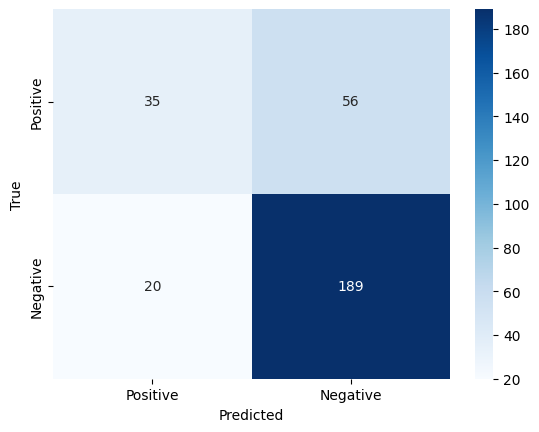

In [72]:
X = df.drop('Risk', axis=1)
y = df['Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels for x and y axes
labels = ['Positive', 'Negative']

# Plot confusion matrix as heatmap with axis labels
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

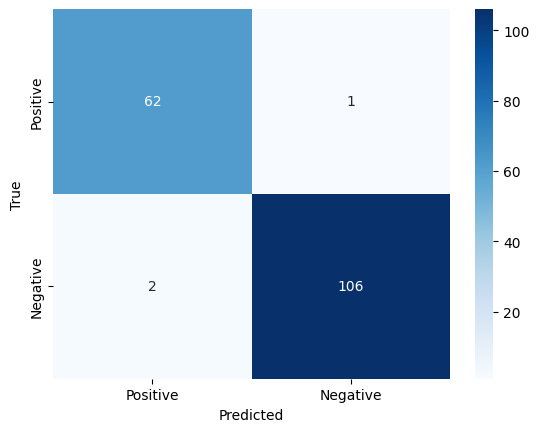

In [73]:
X = df2.drop('target', axis=1)
y = df2['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features using StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define labels for x and y axes
labels = ['Positive', 'Negative']

# Plot confusion matrix as heatmap with axis labels
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()